## Matplotlib

Documentação Oficial:

https://matplotlib.org/

## 1. Instalando e importando módulos

In [ ]:
!pip install yfinance

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

## 2. Calculando Médias Móveis

In [12]:
vale3 = yf.download('vale3.SA')

[*********************100%***********************]  1 of 1 completed


In [58]:
vale3

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,3.500000,3.542500,3.500000,3.500000,2.099435,585600
2000-01-04,3.466666,3.474166,3.416666,3.416666,2.049448,782400
2000-01-05,3.375000,3.416666,3.375000,3.416666,2.049448,1876800
2000-01-06,3.416666,3.500000,3.416666,3.416666,2.049448,792000
2000-01-07,3.458333,3.559166,3.458333,3.541666,2.124428,5347200
...,...,...,...,...,...,...
2021-05-07,116.540001,116.550003,114.190002,115.449997,115.449997,21678700
2021-05-10,119.800003,120.449997,114.690002,114.690002,114.690002,38889400
2021-05-11,113.980003,118.720001,113.320000,118.720001,118.720001,28693600


In [18]:
medias = pd.DataFrame()
medias['mm9'] = vale3['Adj Close'].rolling(9).mean()
medias['mm21'] = vale3['Adj Close'].rolling(21).mean()
medias['mm50'] = vale3['Adj Close'].rolling(50).mean()
medias['mm200'] = vale3['Adj Close'].rolling(200).mean()

medias

,mm9,mm21,mm50,mm200
Date,,,,
2000-01-03,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-05-07,111.419999,108.467619,101.655663,76.894225
2021-05-10,111.927777,108.952857,102.117780,77.184319
2021-05-11,112.683333,109.701429,102.683272,77.494150


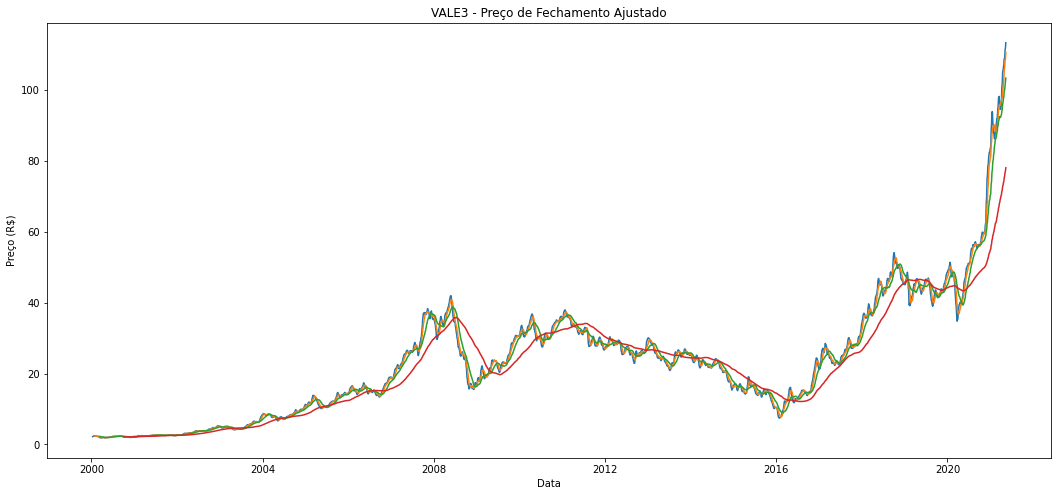

In [34]:
plt.figure(figsize=(18,8))
plt.title('VALE3 - Preço de Fechamento Ajustado')
plt.ylabel('Preço (R$)')
plt.xlabel('Data')
plt.plot(medias['mm9']);
plt.plot(medias['mm21']);
plt.plot(medias['mm50']);
plt.plot(medias['mm200']);
#medias.plot(figsize=(18,8));

## 3. Plotando Gráficos

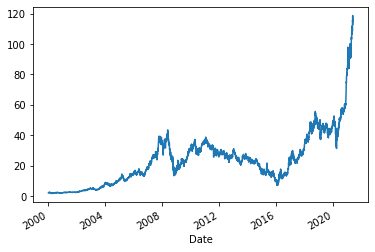

In [15]:
# Método 1: Usando o plot interno do Pandas
vale3['Adj Close'].plot();


### 3.1 Aumentando o tamanho

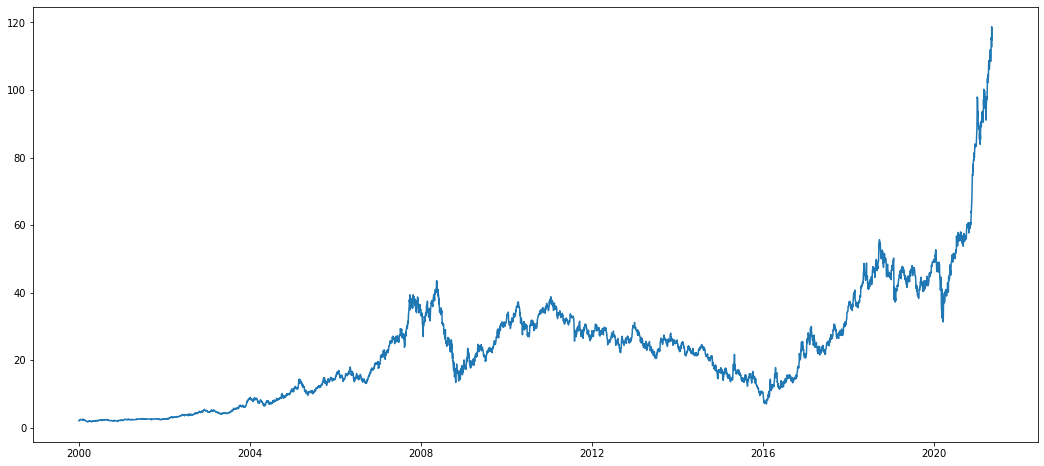

In [16]:
# Método 2: Usando o plt do Matplotlib
plt.figure(figsize=(18,8))
plt.plot(vale3['Adj Close']);

### 3.2 Adicionando um título

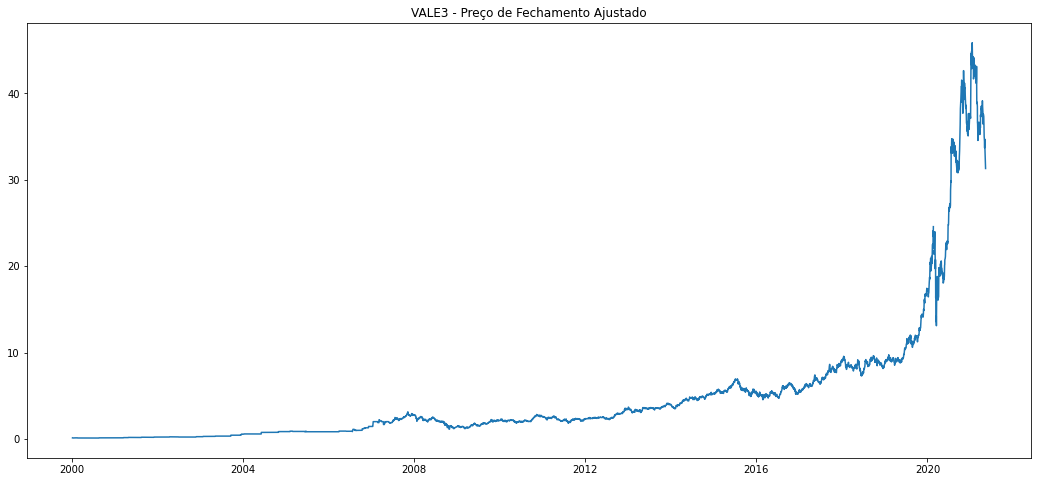

In [ ]:
plt.figure(figsize=(18,8))

plt.title('VALE3 - Preço de Fechamento Ajustado')

plt.plot(vale3['Adj Close']);


### 3.3 Nomeando eixos

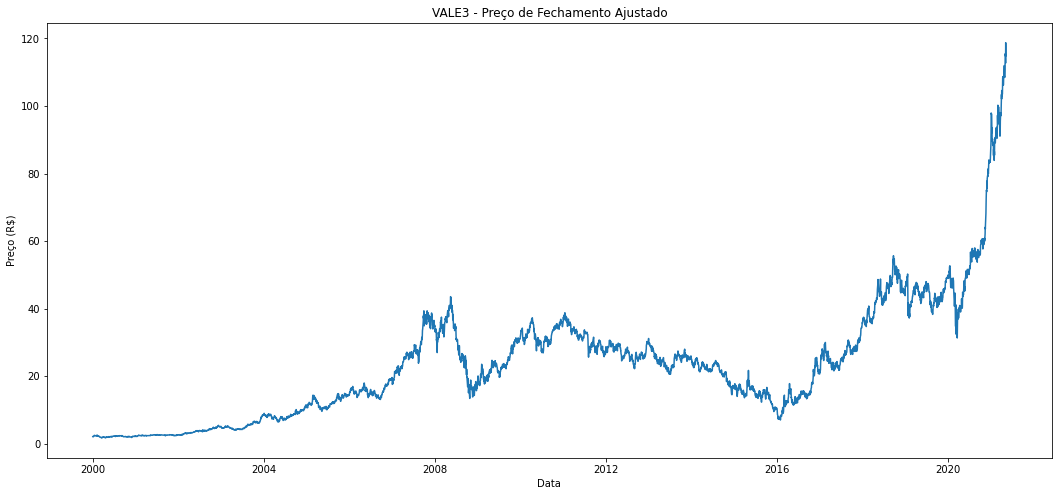

In [17]:
plt.figure(figsize=(18,8))

plt.title('VALE3 - Preço de Fechamento Ajustado')
plt.ylabel('Preço (R$)')
plt.xlabel('Data')

plt.plot(vale3['Adj Close']);

### 3.4 Alterando propriedades da linha

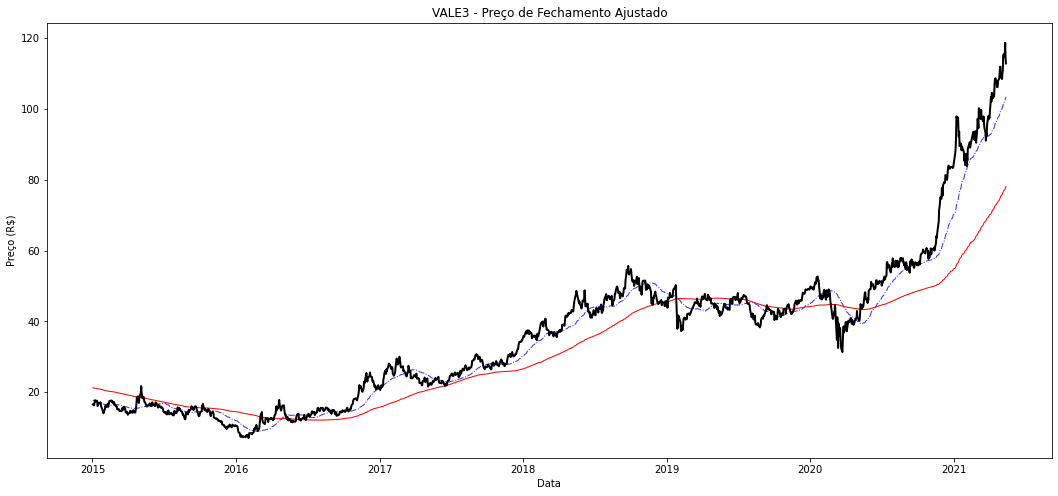

In [49]:
plt.figure(figsize=(18,8))

plt.title('VALE3 - Preço de Fechamento Ajustado')
plt.ylabel('Preço (R$)')
plt.xlabel('Data')

plt.plot(medias['mm50']['2015':], color='blue', linewidth=1.0, linestyle='-.', alpha=0.8)
plt.plot(medias['mm200']['2015':], color='red', linewidth=1.0)
plt.plot(vale3['Adj Close']['2015':], color='black', linewidth=2.0);


### 3.5 Adicionando Legenda

In [ ]:
plt.figure(figsize=(18,8))

plt.title('VALE3 - Preço de Fechamento Ajustado')
plt.ylabel('Preço (R$)')
plt.xlabel('Data')

plt.plot(medias['mm50']['2019':], color='blue', linewidth=1.0, linestyle='-.', alpha=0.8, label='média 50 dias')
plt.plot(medias['mm200']['2019':], color='red', linewidth=1.0, label='média 200 dias')
plt.plot(vale3['Adj Close']['2019':], color='black', linewidth=2.0, label='fechamento')

plt.legend();

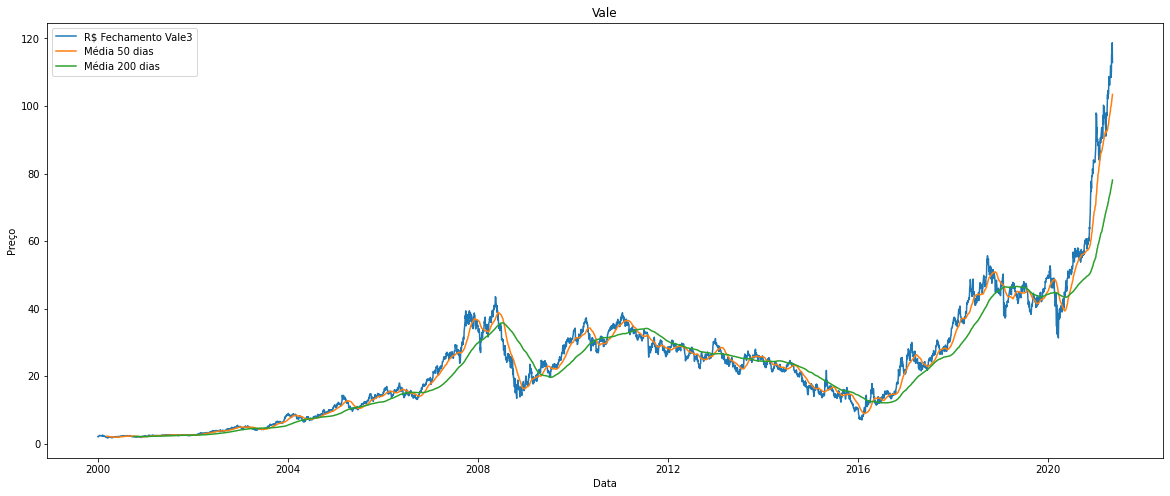

In [61]:
# Método 3: Usando subplots()
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(vale3['Adj Close'], label='R$ Fechamento Vale3')
ax.plot(medias['mm50'], label='Média 50 dias')
ax.plot(medias['mm200'], label='Média 200 dias')
ax.set_title('Vale')
ax.set_ylabel('Preço')
ax.set_xlabel('Data')
ax.legend()

Text(0, 0.5, 'Volume')

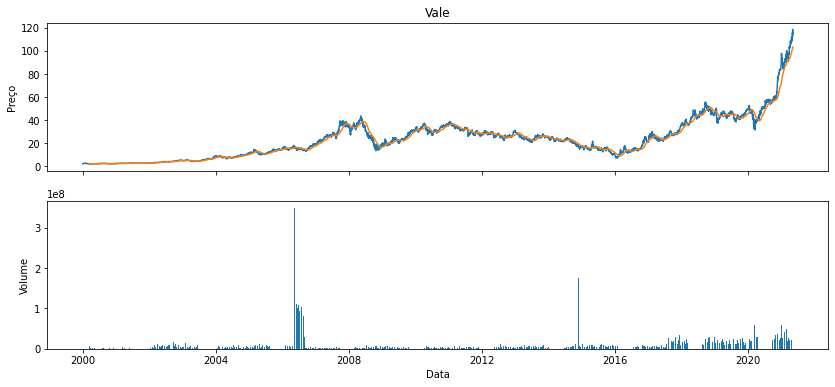

In [64]:
fig, (ax1, ax2) = plt.subplots(2,1,  figsize=(14,6), sharex=True)
ax1.plot(vale3['Adj Close'])
ax1.plot(medias['mm50'])
ax1.set_title('Vale')
ax1.set_ylabel('Preço')
ax2.set_xlabel('Data')

ax2.bar(vale3.index,  vale3['Volume'])
ax2.set_ylabel('Volume')